Data Overview:
   Year  TotalWeightedObservations  GMSL_noGIA  StdDevGMSL_noGIA  \
0  1993                  327401.31      -38.59             89.86   
1  1993                  324498.41      -41.97             90.86   
2  1993                  333018.19      -41.93             87.27   
3  1993                  297483.19      -42.67             90.75   
4  1993                  321635.81      -37.86             90.26   

   SmoothedGSML_noGIA  GMSL_GIA  StdDevGMSL_GIA  SmoothedGSML_GIA  \
0              -38.76    -38.59           89.86            -38.75   
1              -39.78    -41.97           90.86            -39.77   
2              -39.62    -41.91           87.27            -39.61   
3              -39.67    -42.65           90.74            -39.64   
4              -38.75    -37.83           90.25            -38.72   

   SmoothedGSML_GIA_sigremoved  
0                       -38.57  
1                       -39.11  
2                       -38.58  
3                       -38.3

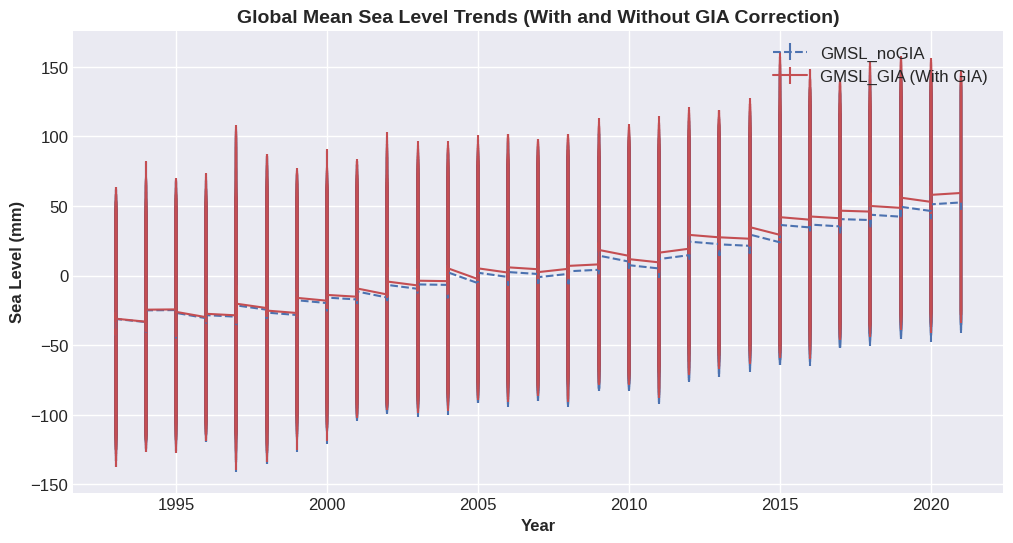

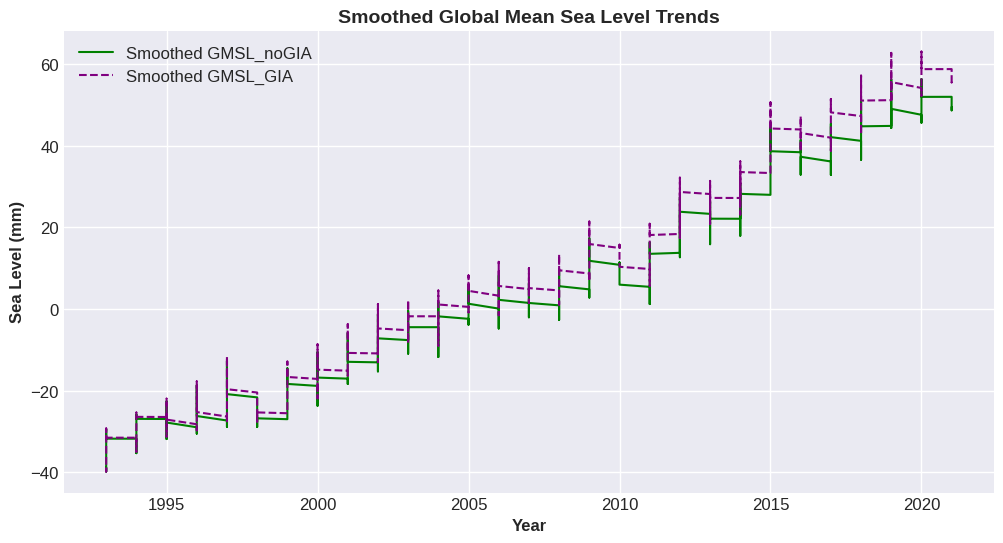

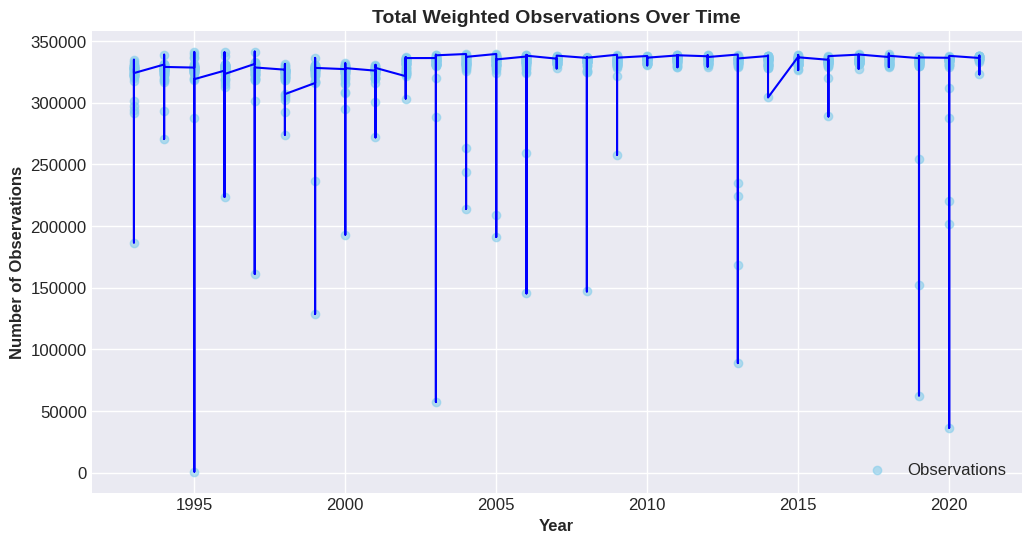

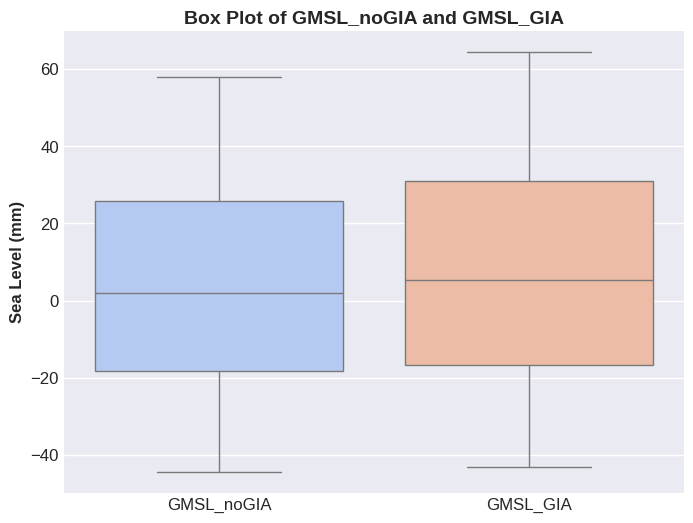

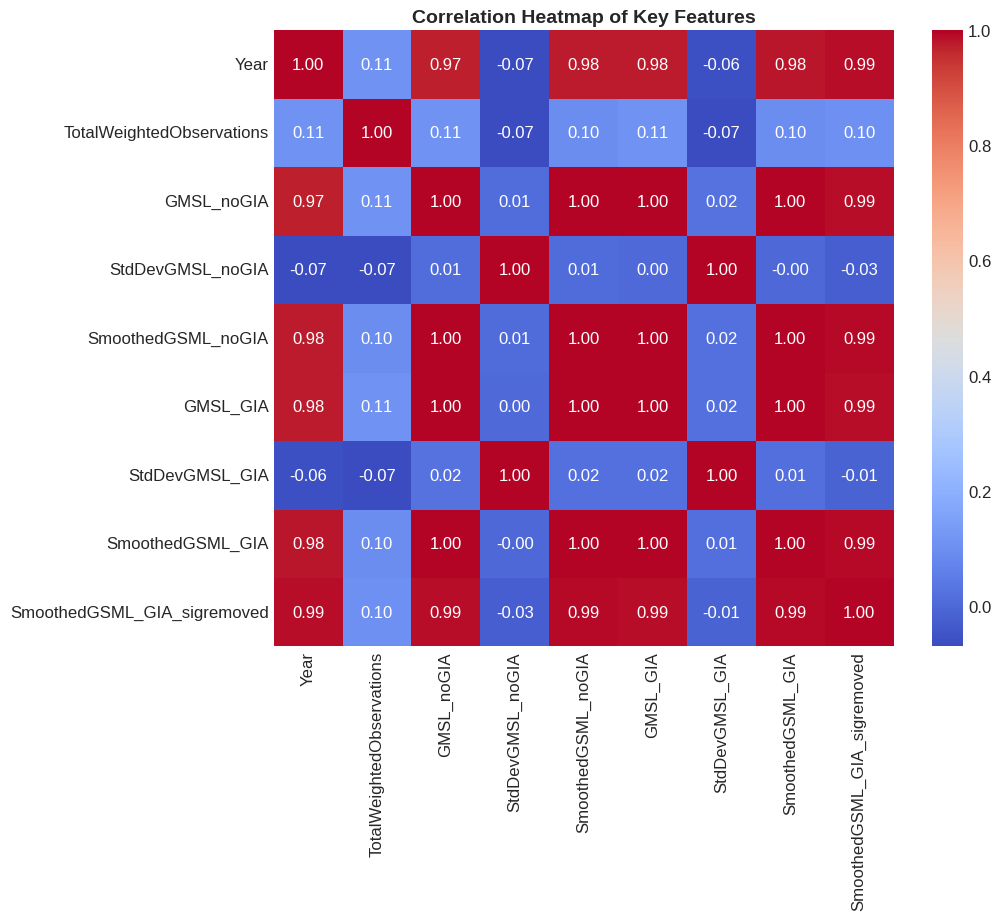

In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Plot Style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("muted")
plt.rcParams.update({
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12
})

# Load the Dataset
file_path = "/content/sealevel (1993-2021).csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# -----------------------------------------------
# Step 1: Data Overview and Summary Statistics
# -----------------------------------------------
print("Data Overview:")
print(df.head())

# Summary Table
summary_stats = df.describe()
summary_table = summary_stats.loc[['mean', 'std', 'min', '50%', 'max'], :]
print("\nSummary Statistics:\n", summary_table)

# -----------------------------------------------
# Step 2: Visualization 1 - Sea Level Trends
# -----------------------------------------------
plt.figure(figsize=(12, 6))
plt.errorbar(df['Year'], df['GMSL_noGIA'], yerr=df['StdDevGMSL_noGIA'], fmt='b--', label="GMSL_noGIA")
plt.errorbar(df['Year'], df['GMSL_GIA'], yerr=df['StdDevGMSL_GIA'], fmt='r-', label="GMSL_GIA (With GIA)")
plt.title("Global Mean Sea Level Trends (With and Without GIA Correction)")
plt.xlabel("Year")
plt.ylabel("Sea Level (mm)")
plt.legend()
plt.show()

# -----------------------------------------------
# Step 3: Visualization 2 - Smoothed Sea Levels
# -----------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['SmoothedGSML_noGIA'], color='green', linestyle='-', label="Smoothed GMSL_noGIA")
plt.plot(df['Year'], df['SmoothedGSML_GIA'], color='purple', linestyle='--', label="Smoothed GMSL_GIA")
plt.title("Smoothed Global Mean Sea Level Trends")
plt.xlabel("Year")
plt.ylabel("Sea Level (mm)")
plt.legend()
plt.show()

# -----------------------------------------------
# Step 4: Visualization 3 - Total Observations
# -----------------------------------------------
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['TotalWeightedObservations'], color='skyblue', alpha=0.6, label="Observations")
plt.plot(df['Year'], df['TotalWeightedObservations'], color='blue')
plt.title("Total Weighted Observations Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Observations")
plt.legend()
plt.show()

# -----------------------------------------------
# Step 5: Box Plot of Sea Levels
# -----------------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['GMSL_noGIA', 'GMSL_GIA']], palette="coolwarm")
plt.title("Box Plot of GMSL_noGIA and GMSL_GIA")
plt.ylabel("Sea Level (mm)")
plt.show()

# -----------------------------------------------
# Step 6: Correlation Heatmap
# -----------------------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.show()